In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
train=pd.read_csv(r"/kaggle/input/nsl-kdd/kdd_train.csv")
test=pd.read_csv(r"/kaggle/input/nsl-kdd/kdd_test.csv")
df=pd.concat([train,test],axis=0)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.00,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.0,0.00,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.0,0.00,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.2,0.00,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.0,0.00,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,395,1,0.06,0.0,0.93,1.0,0.00,1.00,0.00,255,1,0.00,1.00,0.00,0.00,0.09,0.00,0.91,1.00,satan
22540,0,tcp,http,SF,254,2277,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.00,0.0,1.00,0.00,0.00,27,255,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal
22541,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202,10,1.00,1.0,0.00,0.0,0.05,0.07,0.00,255,25,0.10,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
22542,0,tcp,private,RSTR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.00,0.0,0.50,1.0,0.50,1.00,0.00,255,1,0.00,0.58,0.57,0.00,0.00,0.00,0.58,1.00,portsweep


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  root_

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,282.850980,4.051230e+04,1.722710e+04,0.000182,0.021822,0.000121,0.196994,0.002370,0.397308,0.276231,0.001448,0.001098,0.298525,0.012147,0.000458,0.004101,0.0,0.000013,0.010208,84.046729,27.926702,0.276324,0.274494,0.125636,0.126641,0.664048,0.064439,0.096870,182.866870,116.787910,0.524935,0.083248,0.147277,0.031895,0.276092,0.270477,0.124323,0.125298
std,2545.220043,5.409528e+06,3.703596e+06,0.013482,0.248406,0.014678,2.087903,0.058437,0.489342,22.490762,0.038021,0.045155,22.999664,0.468356,0.023778,0.099098,0.0,0.003670,0.100516,115.287822,73.544207,0.442347,0.442972,0.326640,0.329570,0.438869,0.184633,0.258977,98.964628,110.868085,0.448749,0.190616,0.308485,0.111598,0.440218,0.441200,0.312011,0.324583
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,65.000000,0.540000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df.dropna(inplace=True)

In [9]:
duplicates=df.duplicated()
duplicates[duplicates==True]

0        True
1        True
3        True
4        True
5        True
         ... 
22539    True
22540    True
22541    True
22542    True
22543    True
Length: 15791, dtype: bool

In [10]:
len(duplicates[duplicates==True])

15791

In [11]:
df.drop_duplicates()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22512,0,tcp,http,SF,237,458,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,255,1.00,0.00,1.00,0.08,0.00,0.00,0.00,0.00,normal
22521,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,3,0.0,0.0,0.0,0.0,0.11,0.07,0.00,255,11,0.04,0.72,1.00,0.00,0.00,0.00,0.00,0.00,satan
22530,0,udp,private,SF,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess
22537,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.45,0.00,0.00,0.39,0.78,0.44,0.02,processtable


In [12]:
df.drop('num_outbound_cmds',inplace=True,axis=1)

In [13]:
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

In [14]:
x = df.drop("labels",axis=1)
y = df['labels']

In [15]:
X_train , X_test , Y_train , Y_test  = train_test_split(x,y,test_size=.2,random_state=42)

In [16]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols.remove('labels')

In [17]:
print(numerical_cols)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [18]:
print(categorical_cols)

['protocol_type', 'service', 'flag']


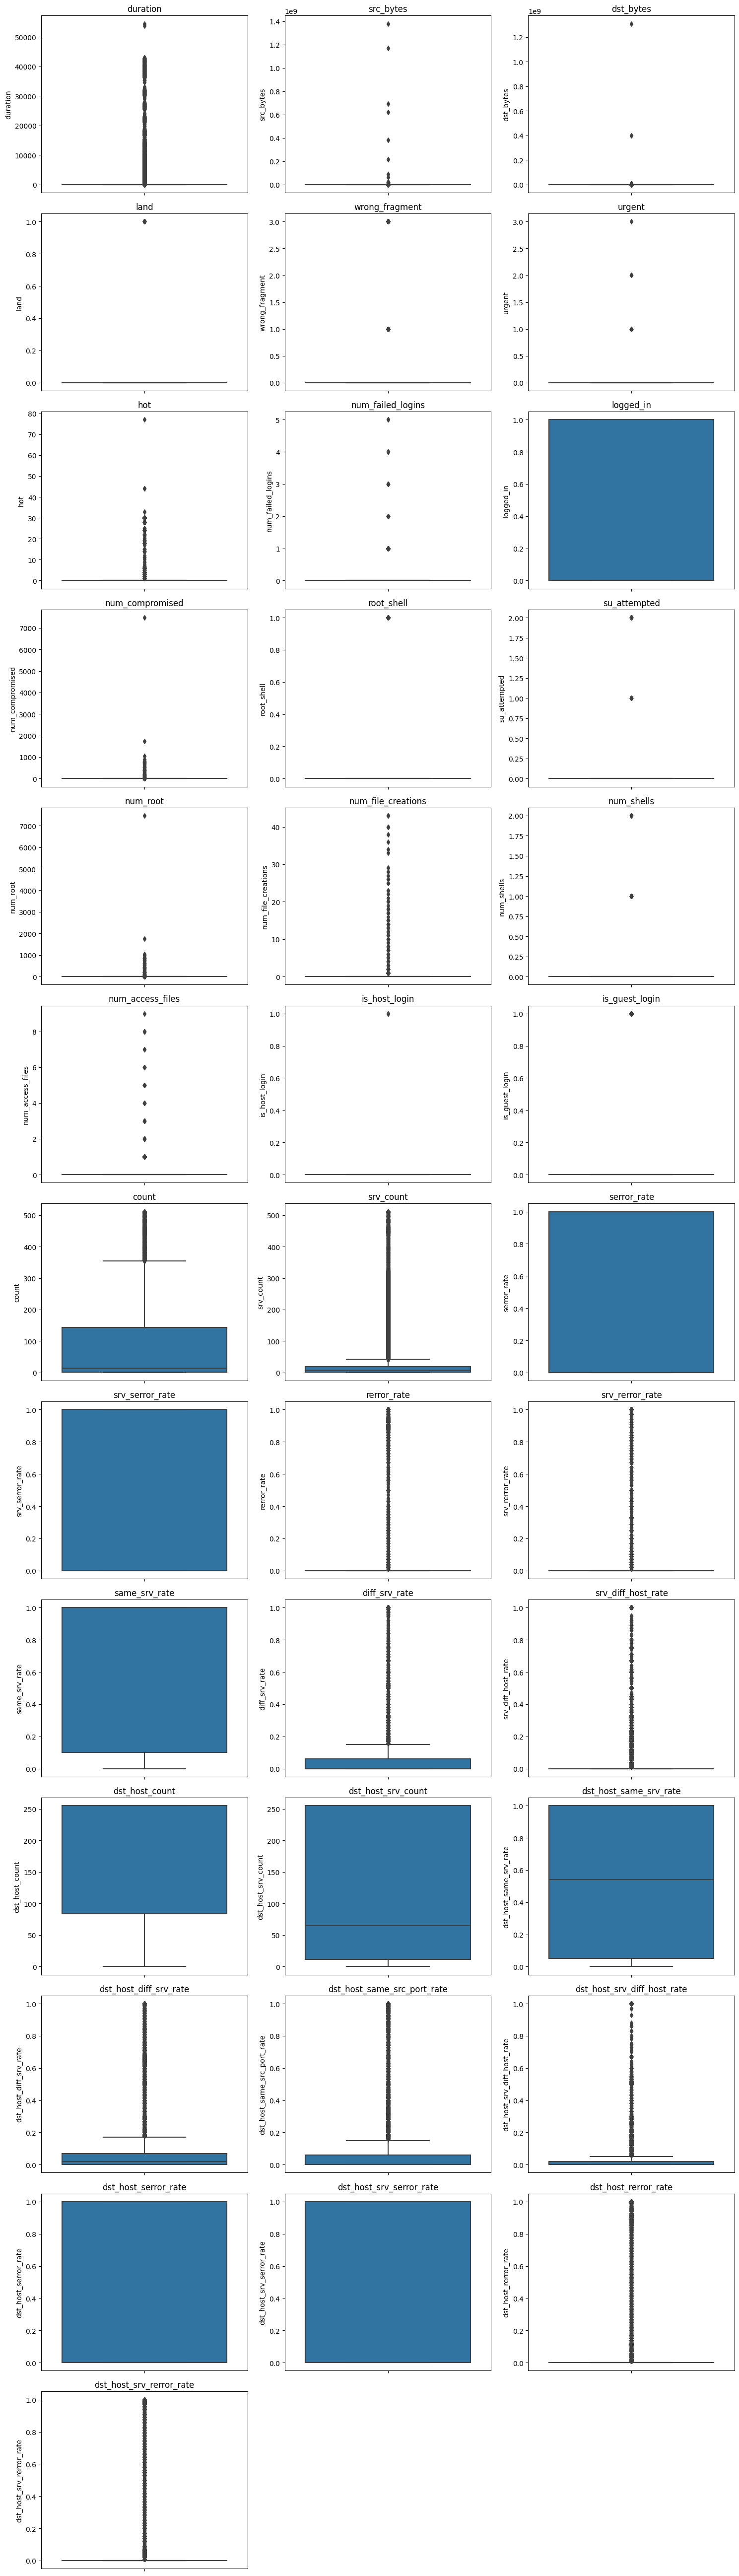

In [23]:
# Define the number of columns per row
num_cols = 3  # Change this based on your dataset
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
for col in numerical_cols :
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    X_train[col] = np.clip(X_train[col],lower_bound,upper_bound)
    X_test[col] = np.clip(X_test[col],lower_bound,upper_bound)

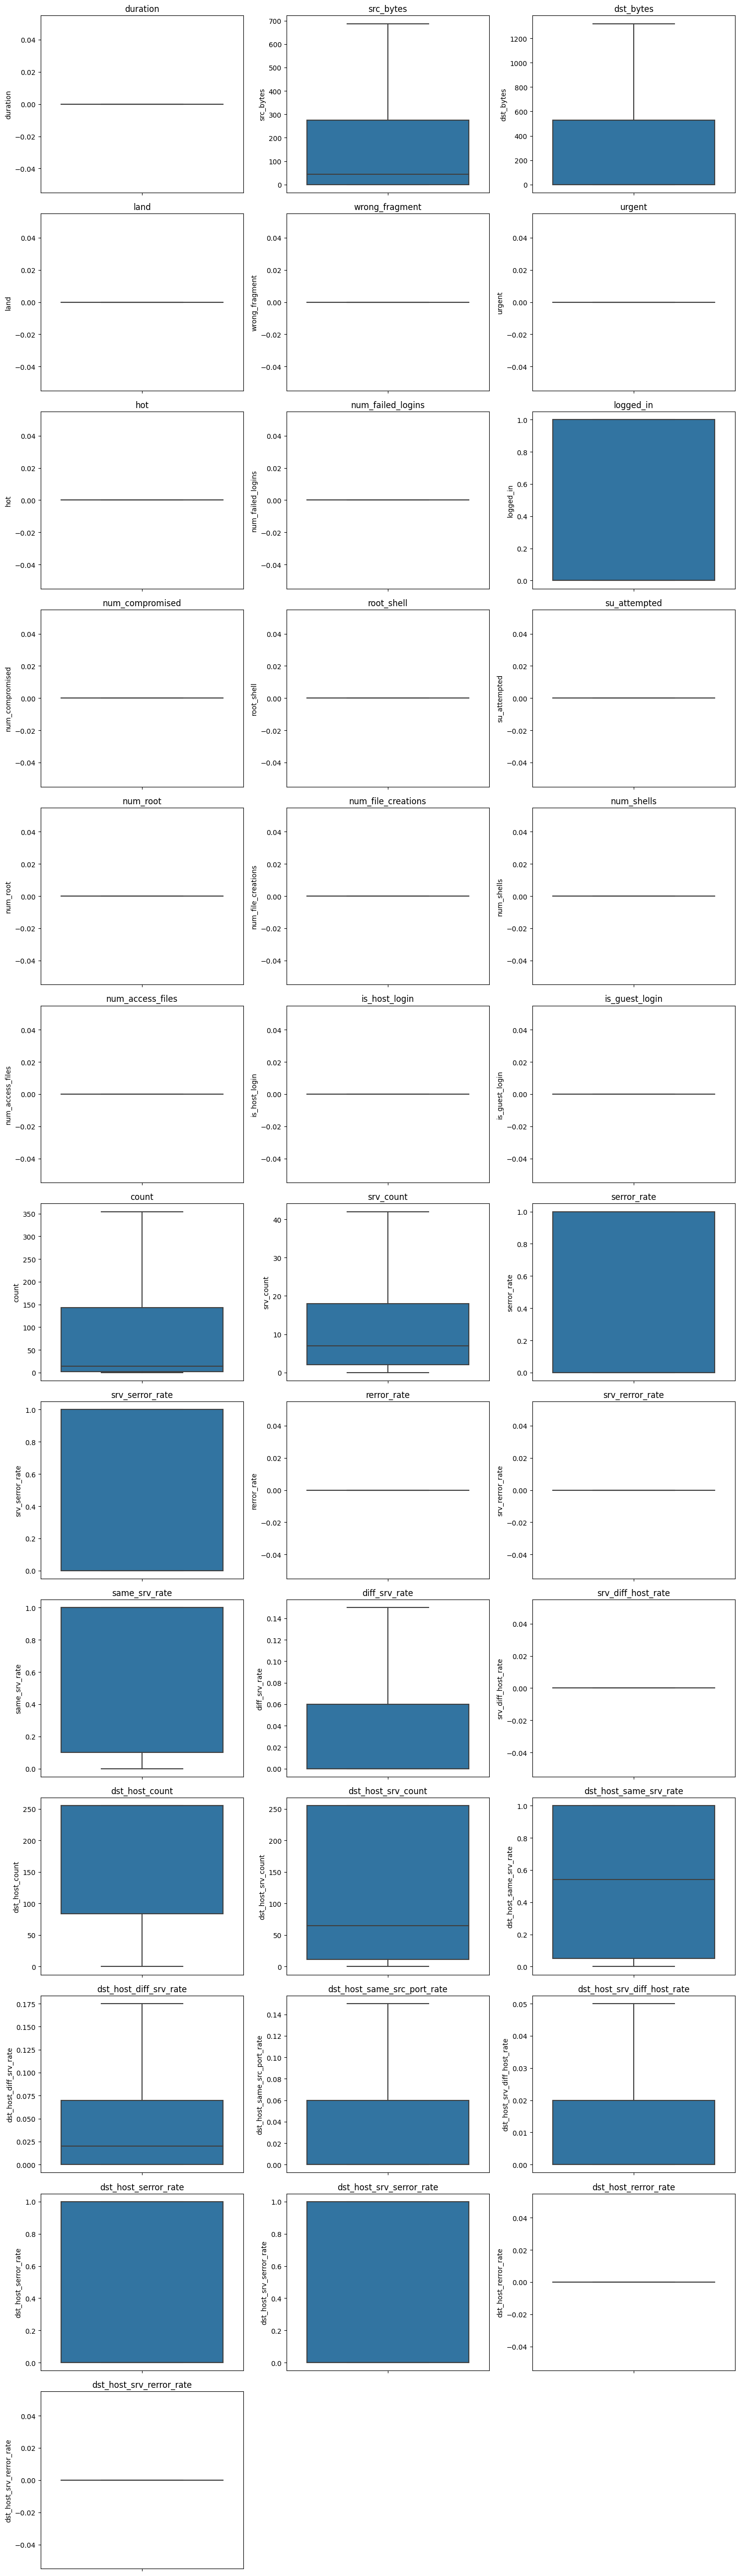

In [25]:
# Define the number of columns per row
num_cols = 3  # Change this based on your dataset
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=X_train[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

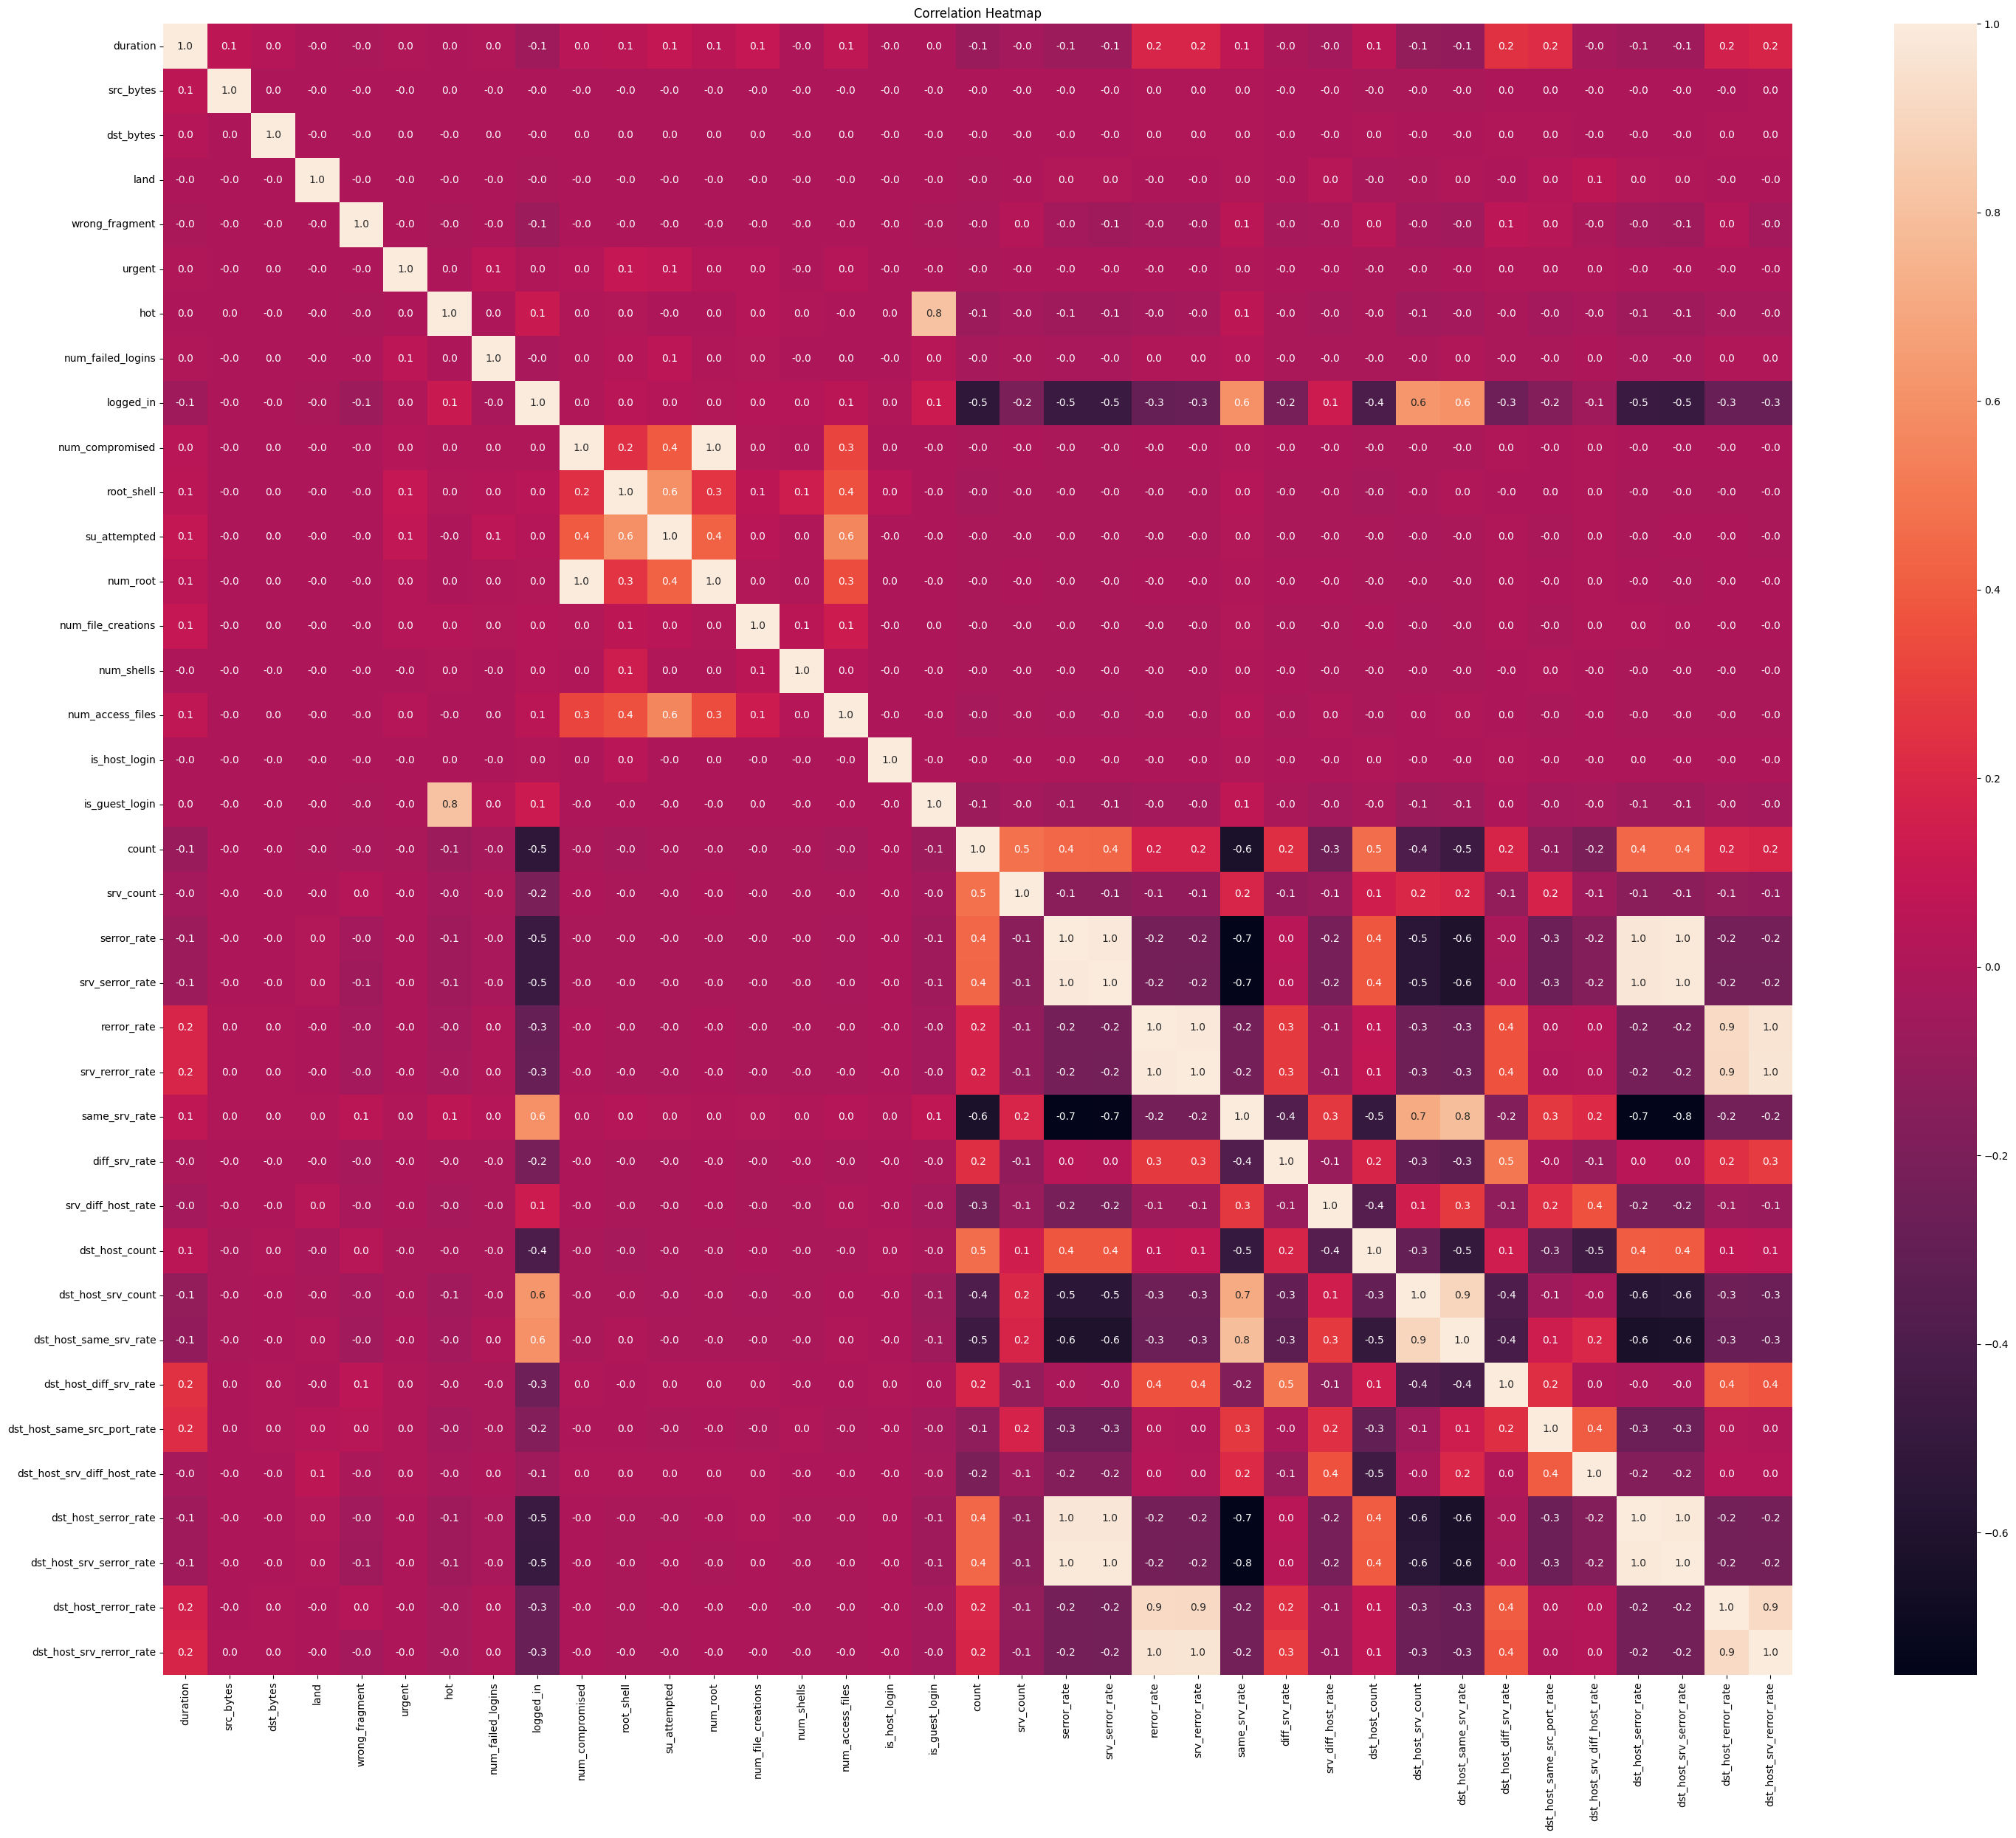

In [24]:
plt.figure(figsize=(30,25))
plt.title('Correlation Heatmap')
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.1f')
plt.tight_layout()
plt.savefig('heatmap_nsl.jpg',dpi=300,bbox_inches='tight')
plt.show()

In [27]:
df[numerical_cols].corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.066729,0.032913,-0.001499,-0.009763,0.003136,0.000496,0.005908,-0.063727,0.047606,0.052698,0.090388,0.050721,0.096168,-0.001559,0.072268,-0.000249,0.000439,-0.079007,-0.039428,-0.068661,-0.068308,0.187228,0.186999,0.074853,-0.014662,-0.040017,0.050927,-0.106384,-0.112695,0.246124,0.221706,-0.026310,-0.061725,-0.060963,0.163676,0.185900
src_bytes,0.066729,1.000000,0.000222,-0.000101,-0.000656,-0.000060,0.000339,-0.000302,-0.003011,-0.000086,-0.000272,-0.000178,-0.000094,-0.000168,-0.000134,-0.000298,-0.000027,-0.000745,-0.004948,-0.002672,-0.003073,-0.003267,0.012228,0.012422,0.003797,-0.000514,-0.002482,-0.005569,-0.006593,-0.006221,0.000838,0.000586,-0.001493,-0.004228,-0.003238,-0.001572,0.011047
dst_bytes,0.032913,0.000222,1.000000,-0.000063,-0.000409,0.000232,-0.000304,0.000628,-0.002581,0.001272,0.001239,0.001450,0.001266,0.000105,-0.000078,0.000393,-0.000012,-0.000412,-0.003323,-0.001645,-0.002829,-0.002812,0.009974,0.009876,0.003554,-0.001604,-0.001554,0.002228,-0.003921,-0.004062,0.010022,0.010883,-0.001179,-0.002800,-0.002727,0.010507,0.010062
land,-0.001499,-0.000101,-0.000063,1.000000,-0.001185,-0.000111,-0.001272,-0.000547,-0.010948,-0.000166,-0.000513,-0.000328,-0.000175,-0.000350,-0.000260,-0.000558,-0.000049,-0.001369,-0.009371,-0.004788,0.021304,0.022085,-0.004162,-0.005182,0.008433,-0.001785,0.037382,-0.024579,-0.013682,0.011237,-0.004422,0.032855,0.067258,0.019644,0.012867,-0.005165,-0.005205
wrong_fragment,-0.009763,-0.000656,-0.000409,-0.001185,1.000000,-0.000725,-0.008289,-0.003563,-0.071328,-0.001079,-0.003345,-0.002135,-0.001140,-0.002278,-0.001692,-0.003635,-0.000322,-0.008921,-0.020339,0.023525,-0.041600,-0.054438,-0.033352,-0.033758,0.053523,-0.026242,-0.025057,0.038929,-0.045178,-0.048032,0.056321,0.037678,-0.015023,-0.049834,-0.053856,0.026011,-0.033913
urgent,0.003136,-0.000060,0.000232,-0.000111,-0.000725,1.000000,0.000979,0.062464,0.008295,0.033817,0.096207,0.081071,0.032104,0.024272,-0.000159,0.027432,-0.000030,-0.000839,-0.005948,-0.003023,-0.005158,-0.005117,-0.003176,-0.003173,0.006321,-0.002882,-0.003089,-0.008314,-0.007738,-0.003556,0.007464,0.002943,0.004011,-0.005012,-0.005062,-0.002790,-0.001718
hot,0.000496,0.000339,-0.000304,-0.001272,-0.008289,0.000979,1.000000,0.000919,0.115059,0.001936,0.018630,-0.000151,0.001370,0.026438,0.005914,-0.001561,0.001411,0.813648,-0.067654,-0.034071,-0.057482,-0.057139,-0.032806,-0.032010,0.068387,-0.017262,-0.026123,-0.012859,-0.051310,-0.035724,-0.011519,-0.033938,-0.024115,-0.056563,-0.056676,-0.030535,-0.032319
num_failed_logins,0.005908,-0.000302,0.000628,-0.000547,-0.003563,0.062464,0.000919,1.000000,-0.020686,0.013447,0.028761,0.062807,0.012474,0.015431,-0.000781,0.000647,-0.000149,0.038295,-0.029141,-0.014759,-0.023513,-0.023832,0.010151,0.009937,0.030149,-0.010942,-0.015171,-0.010451,-0.013553,0.002430,-0.007129,-0.012199,0.000932,-0.020867,-0.021224,0.007496,0.007187
logged_in,-0.063727,-0.003011,-0.002581,-0.010948,-0.071328,0.008295,0.115059,-0.020686,1.000000,0.015127,0.046895,0.029936,0.015986,0.031884,0.023716,0.050964,0.004520,0.119874,-0.537252,-0.199669,-0.483910,-0.482237,-0.288528,-0.284839,0.597471,-0.220269,0.128596,-0.397812,0.621866,0.602501,-0.256237,-0.164908,-0.054960,-0.483561,-0.485575,-0.280213,-0.278915
num_compromised,0.047606,-0.000086,0.001272,-0.000166,-0.001079,0.033817,0.001936,0.013447,0.015127,1.000000,0.238175,0.393884,0.998723,0.016389,0.001954

In [68]:
corr_features=set()
threshold=0.85
corr_matrix=X_train[numerical_cols].corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if i not in corr_features and j not in corr_features:
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corr_features.add(colname)
corr_features

{'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'srv_serror_rate'}

In [69]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [70]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [71]:
from sklearn.preprocessing import OneHotEncoder
Ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_train=Ohe.fit_transform(X_train[categorical_cols])
encoded_train=pd.DataFrame(encoded_train,columns=Ohe.get_feature_names_out(categorical_cols))
encoded_test=Ohe.transform(X_test[categorical_cols])
encoded_test=pd.DataFrame(encoded_test,columns=Ohe.get_feature_names_out(categorical_cols))
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [72]:
X_train=X_train.reset_index(drop=True)
encoded_train=encoded_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
encoded_test=encoded_test.reset_index(drop=True)

In [73]:
X_train=pd.concat([X_train,encoded_train],axis=1)
X_test=pd.concat([X_test,encoded_test],axis=1)
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,...,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,687.5,332,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,1,0.0,0.0,0.0,1.00,0.00,0.0,41,166,0.15,0.02,0.02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,687.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,354.5,42,0.0,0.0,0.0,1.00,0.00,0.0,255,177,0.02,0.15,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,687.5,330,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,1,0.0,0.0,0.0,1.00,0.00,0.0,208,245,0.01,0.00,0.01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219.0,4,1.0,0.0,0.0,0.02,0.06,0.0,255,17,0.07,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,231.0,2,1.0,0.0,0.0,0.01,0.07,0.0,255,2,0.08,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118808,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258.0,4,0.0,0.0,0.0,0.02,0.07,0.0,255,4,0.09,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])

In [75]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,...,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,2.318626,-0.034129,0.0,0.0,0.0,0.0,0.0,1.234206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.761283,-0.872732,-0.624965,0.0,0.0,0.765946,-0.687777,0.0,-1.432850,0.443187,2.060639,-0.326665,0.562144,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,2.318626,-0.673697,0.0,0.0,0.0,0.0,0.0,-0.810237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.613814,2.344759,-0.624965,0.0,0.0,0.765946,-0.687777,0.0,0.729111,0.542401,-0.458714,1.854315,-0.579205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.318626,-0.037982,0.0,0.0,0.0,0.0,0.0,1.234206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.761283,-0.872732,-0.624965,0.0,0.0,0.765946,-0.687777,0.0,0.254287,1.155722,-0.652510,-0.662200,-0.008530,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.763301,-0.673697,0.0,0.0,0.0,0.0,0.0,-0.810237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.320106,-0.637306,1.635641,0.0,0.0,-1.466684,0.683453,0.0,0.729111,-0.900707,0.510268,-0.662200,-0.579205,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.763301,-0.673697,0.0,0.0,0.0,0.0,0.0,-0.810237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.434678,-0.794256,1.635641,0.0,0.0,-1.489466,0.911992,0.0,0.729111,-1.035999,0.704064,-0.662200,-0.579205,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

<Axes: xlabel='labels', ylabel='count'>

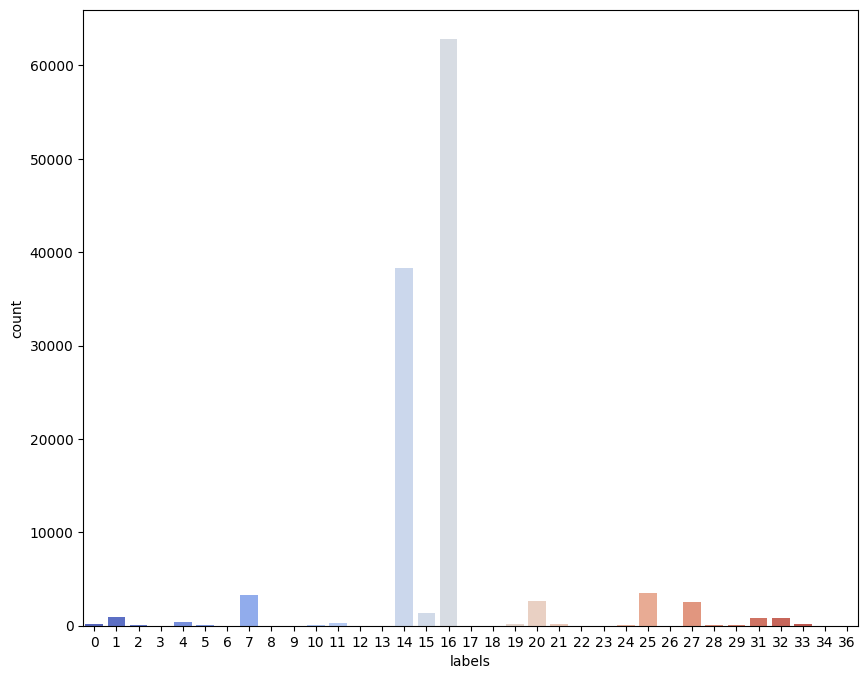

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x=Y_train, palette= 'coolwarm')

In [77]:
Y_train.value_counts()

labels
16    62825
14    38272
25     3497
7      3301
20     2691
27     2545
15     1333
1       944
31      815
32      782
4       357
11      246
33      235
0       181
19      181
21      181
10       76
24       76
29       72
2        37
5        35
28       32
12       14
8        13
9        12
6        11
23        9
3         9
22        8
26        8
18        5
36        3
17        3
34        2
13        2
Name: count, dtype: int64

In [38]:
from collections import Counter
class_counts=Counter(Y_train)
sampling_strategy={}
majority_count=max(class_counts.values())
majority_class=max(class_counts,key=class_counts.get)
for label,count in class_counts.items():
    if label==majority_class:
        continue
    if count < 1000:
        sampling_strategy[label] = 10000
    elif count < 5000:
        sampling_strategy[label] = 15000
    else:
        sampling_strategy[label] = count
    

In [39]:
from imblearn.over_sampling import SMOTE
Smote = SMOTE(sampling_strategy=sampling_strategy,random_state=42,k_neighbors=1)
X_train_smote , y_train_smote = Smote.fit_resample(X_train,Y_train)

<Axes: xlabel='labels', ylabel='count'>

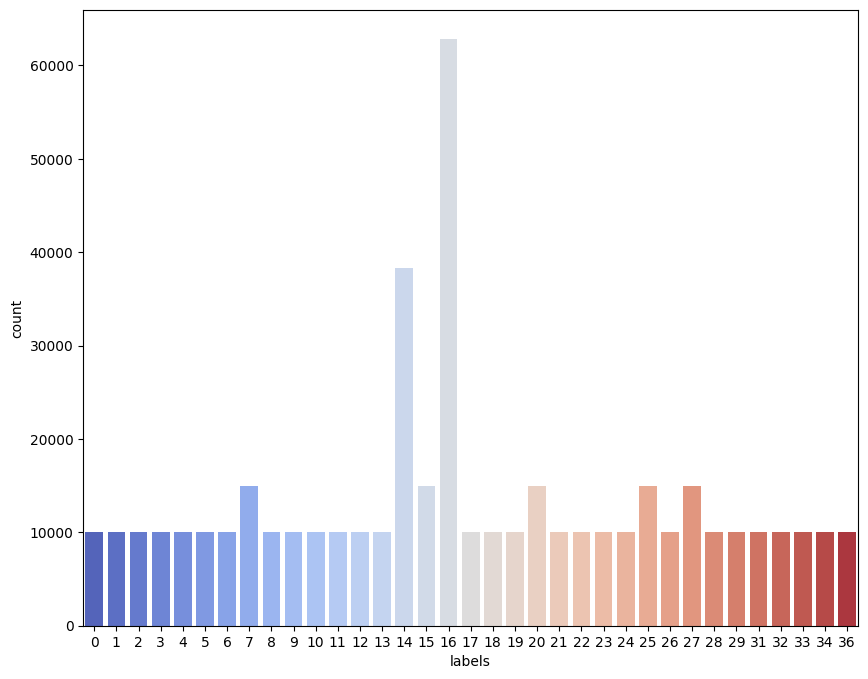

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x=y_train_smote, palette= 'coolwarm')

In [41]:
X_train_smote_df =pd.DataFrame(X_train_smote)
y_train_smote_df = pd.DataFrame(y_train_smote)
X_test_smote_df =pd.DataFrame(X_test)
y_test_smote_df = pd.DataFrame(Y_test)

X_train_smote_df.to_csv("X_train_smote.csv")
y_train_smote_df.to_csv("Y_train_smote.csv")
X_test_smote_df.to_csv("X_test_smote.csv")
y_test_smote_df.to_csv("Y_test_smote.csv")

In [42]:
X_train_smote_df=pd.read_csv(r"/kaggle/working/X_train_smote.csv")
y_train_smote_df=pd.read_csv(r"/kaggle/working/Y_train_smote.csv")
x_test_smote_df=pd.read_csv(r"/kaggle/working/X_test_smote.csv")
y_test_smote_df=pd.read_csv(r"/kaggle/working/Y_test_smote.csv")

In [43]:
import torch
from transformers import AutoTokenizer, AutoModel
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load BERT tokenizer and model
MODEL_NAME = "/kaggle/input/tiny-bertmodel"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME,cache_dir="./cache")
model = AutoModel.from_pretrained(MODEL_NAME, cache_dir="./cache").to(device)  # Binary classification


Using device: cuda


In [44]:
import pandas as pd

# Assuming X_train and X_test are already split
def convert_to_text(df):
    return df.apply(lambda row: ' '.join([f"{col}: {str(row[col])}" for col in df.columns]), axis=1)

# Convert each row in train and test sets to text
X_train_text = convert_to_text(X_train_smote_df)
X_test_text = convert_to_text(X_test_smote_df)

In [46]:
type(X_train_text)

pandas.core.series.Series

In [49]:
from transformers import AutoTokenizer, AutoModel
import torch
bert_model=torch.nn.DataParallel(model)
bert_model.to(device)
# Function to extract BERT embeddings
def extract_bert_features(texts, batch_size=64):
    all_embeddings = []

    # Convert Pandas Series to a list before indexing
    texts = texts.tolist()
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # Tokenize the batch and move tensors to the correct device
        encoded_input = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt', max_length=512)
        encoded_input = {key: value.to(device,non_blocking=True) for key, value in encoded_input.items()}

        # Get embeddings without computing gradients
        with torch.no_grad():
            outputs = bert_model(**encoded_input)

        # ✅ Move tensor to CPU before converting to NumPy
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  
        all_embeddings.append(embeddings)

    return np.vstack(all_embeddings)

# Assuming X_train_text and X_test_text are Pandas Series containing text data
X_train_bert = pd.DataFrame(extract_bert_features(X_train_text))
X_test_bert = pd.DataFrame(extract_bert_features(X_test_text))

# Save to CSV files
X_train_bert.to_csv("X_train_bert.csv", index=False)
X_test_bert.to_csv("X_test_bert.csv", index=False)

# Print shapes of the extracted features
print("Shape of Train Features:", X_train_bert.shape)
print("Shape of Test Features:", X_test_bert.shape)

Shape of Train Features: (456097, 312)
Shape of Test Features: (29704, 312)


In [4]:
X_train_bert=pd.read_csv(r'/kaggle/input/nsl-output/X_train_bert.csv')
X_test_bert=pd.read_csv(r'/kaggle/input/nsl-output/X_test_bert.csv')
y_train=pd.read_csv(r'/kaggle/input/nsl-output/Y_train_smote.csv')
y_test=pd.read_csv(r'/kaggle/input/nsl-output/Y_test_smote.csv')

In [5]:
X_train_bert.shape,X_test_bert.shape

((456097, 768), (29704, 768))

In [6]:
y_test.drop('Unnamed: 0',axis=1,inplace=True)
y_train.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
        keras.layers.Dense(512,input_shape=(768,),activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(35,activation='softmax')
])
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.001,clipnorm=1.0),
        metrics=['Accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
early_stopping=keras.callbacks.EarlyStopping(
    monitor='val_Accuracy',
    mode='max',
    patience=20,
    restore_best_weights=True
)
model.fit(X_train_bert,y_train,epochs=300,batch_size=512,validation_data=(X_test_bert,y_test),callbacks=[early_stopping])

Epoch 1/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - Accuracy: 0.4366 - loss: 2.1202 - val_Accuracy: 0.5932 - val_loss: nan
Epoch 2/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.7527 - loss: 0.8194 - val_Accuracy: 0.3903 - val_loss: nan
Epoch 3/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.8071 - loss: 0.6362 - val_Accuracy: 0.2444 - val_loss: nan
Epoch 4/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.8293 - loss: 0.5633 - val_Accuracy: 0.8020 - val_loss: nan
Epoch 5/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.8412 - loss: 0.5233 - val_Accuracy: 0.0929 - val_loss: nan
Epoch 6/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.8517 - loss: 0.4876 - val_Accuracy: 0.5852 - val_loss: nan
Epoch 7/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.8580 - loss: 0.4632 - val_Accuracy: 0.4597 - val_loss: nan
Epoch 8/300
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.8630 - loss: 0.4483 - val_Accuracy: 0.4368 - val_l

In [42]:
pred2=model.predict(X_test_bert)
pred2=[np.argmax(i) for i in pred2]
from sklearn.metrics import balanced_accuracy_score
accuracy_score(y_test,pred2)

929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


0.8714651225424185

In [169]:
model.evaluate(X_test_bert,y_test)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - Accuracy: 0.8800 - loss: nan


[nan, 0.879645824432373]

In [170]:
pred=model.predict(X_test_bert)
pred=[np.argmax(i) for i in pred]

929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [171]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Classification Report:\n {classification_report(y_test,pred,zero_division=False)}')

Accuracy: 0.87964583894425
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.79      0.32      0.45        47
           1       0.95      0.55      0.70       239
           2       0.05      0.10      0.07        10
           3       0.00      0.00      0.00         1
           4       0.45      0.55      0.50       107
           5       0.01      1.00      0.03         6
           6       0.00      0.00      0.00         2
           7       0.76      0.57      0.65       777
           8       0.36      0.57      0.44         7
           9       0.00      0.00      0.00         1
          10       0.07      0.83      0.13        18
          11       1.00      0.06      0.12        64
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.97      0.99      0.98      9596
          15       0.67      0

In [43]:
y_train1=[0 if i==16 else 1 for i in np.array(y_train)]
y_test1=[0 if i==16 else 1 for i in np.array(y_test)]
y_train1=pd.DataFrame(y_train1)
y_test1=pd.DataFrame(y_test1)

In [44]:
import tensorflow as tf
from tensorflow import keras
model1=keras.Sequential([
        keras.layers.Dense(128,input_shape=(768,),activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.0005,clipnorm=1.0),
        metrics=['Accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
early_stopping=keras.callbacks.EarlyStopping(
    monitor='val_Accuracy',
    mode='max',
    patience=20,
    restore_best_weights=True
)
model1.fit(X_train_bert,y_train1,epochs=100,batch_size=512,validation_data=(X_test_bert,y_test1),callbacks=[early_stopping])

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9624 - loss: 0.1087 - val_Accuracy: 0.6467 - val_loss: 1.2713
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9642 - loss: 0.1023 - val_Accuracy: 0.7461 - val_loss: 1.1840
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9662 - loss: 0.0985 - val_Accuracy: 0.7105 - val_loss: 1.1874
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9670 - loss: 0.0947 - val_Accuracy: 0.7252 - val_loss: 1.2303
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9670 - loss: 0.0943 - val_Accuracy: 0.5841 - val_loss: 1.9162
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9681 - loss: 0.0914 - val_Accuracy: 0.7395 - val_loss: 1.3711
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9690 - loss: 0.0891 - val_Accuracy: 0.7920 - val_loss: 0.5885
Epoch 8/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9695 - loss: 0.0879 - val_Accu

In [254]:
model1.evaluate(X_test_bert,y_test1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Accuracy: 0.8884 - loss: 0.3147


[0.3133735656738281, 0.8888365030288696]

In [263]:
pred1=model1.predict(X_test_bert)
pred1=[0 if i<0.5 else 1 for i in pred1]

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [264]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test1,pred1)}')
print(f'Classification Report:\n {classification_report(y_test1,pred1,zero_division=False)}')

Accuracy: 0.8888365203339618
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     15763
           1       0.87      0.90      0.88     13941

    accuracy                           0.89     29704
   macro avg       0.89      0.89      0.89     29704
weighted avg       0.89      0.89      0.89     29704



<Axes: >

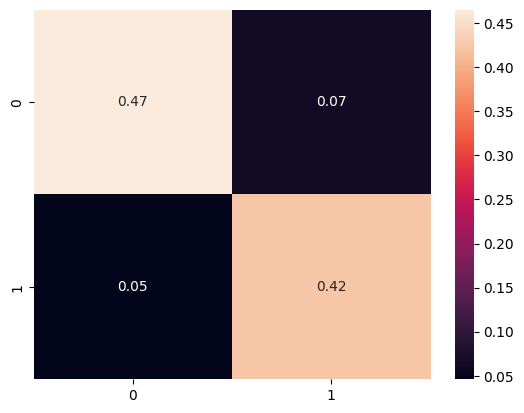

In [265]:
sns.heatmap(confusion_matrix(y_test1,pred1)/len(y_test1),annot=True,fmt='.2f')

In [81]:
import joblib
joblib.dump(le,'LabelEncoder.pkl')
joblib.dump(Ohe,'OneHotEncoder.pkl')
joblib.dump(scaler,'StandardScaler.pkl')

['StandardScaler.pkl']

In [82]:
model.save('model.h5')
model1.save('model_bin.h5')